## Course Materials and Information

* The course [github repository](https://github.com/ucsd-ets/dsc80-wi20): assignments, lectures, references.
    - https://github.com/ucsd-ets/dsc80-wi20
* The course [website](https://sites.google.com/ucsd.edu/dsc80-spring-2020/): syllabus, links, schedule.
    - https://sites.google.com/ucsd.edu/dsc-80-spring-2020
    

## Course Materials

* We kinda-sorta have a book! (finally!)
    - https://afraenkel.github.io/practical-data-science
    - the lecture slides serve as sources of information and practice.

## Secondary references

* Wes McKinney. "Python for Data Analysis" ([Link - requires UCSD internet](proquest.safaribooksonline.com/9781449323592))
* Sam Lau, Joey Gonzalez, and Deb Nolan. "Principles and Techniques of Data Science" (https://www.textbook.ds100.org/)
* Ani Adhikari and John DeNero. "Computational and Inferential Thinking" (https://www.inferentialthinking.com)
* On-line tutorials are great, but be sure to understand the *concepts* in the lecture!

# First Part
### Data Visulization

In [1]:
# magic command for displaying plots in notebook
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_csv('Dataset/data.csv')
data.head()

,id,x,z0,z1,z2,z3
0,3,0.0000,0.000000,0.000000,-0.000000,0.273816
1,3,0.1001,-0.102628,0.001595,0.052832,-0.487302
2,3,0.2002,-0.223206,0.006378,-0.198124,-0.844929
3,2,0.3003,-0.484955,0.014347,0.126451,-0.357906
4,2,0.4004,0.350514,0.025499,0.439444,0.602113


* Use a line plot to plot numeric data.
* `data.plot()` plots a line plot by default.
    - The x-axis is the index by default
    - Can be called out using the key-word argument `x`.

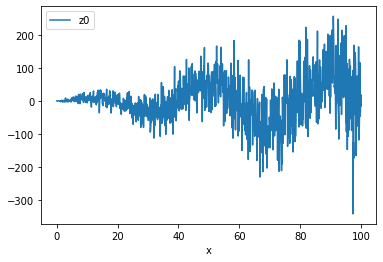

In [3]:
data.plot(x='x', y='z0')

### Plotting (quantitative) empirical distributions in Pandas

* Use the key-word argument `kind`
```
kind : str
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    ...
```
* The `hist` keyword by default uses 10 bins, and returns the *count* of observations within those bins.
    - use `density=True` to return a histogram whose area is normalized to 1.

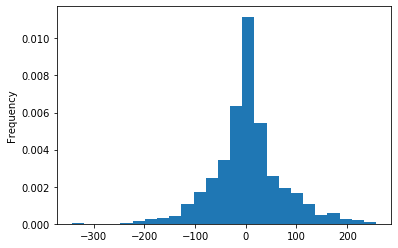

In [4]:
# histogram of z0 values; 
# 25 bins.
# density = normalized histogram

data.z0.plot(kind='hist', bins=25, density=True)

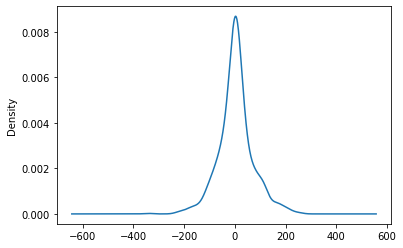

In [5]:
# kernel density estimate of the distribution
# smooth approximation of the empirical distribution

data.z0.plot(kind='kde')

### Plotting (categorical) empirical distributions in Pandas

* Create a distribution from categorical columns using `value_counts`.
* Categorical columns should use *bar charts*.
* Use the key-word argument `kind`
```
kind : str
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    ...
```

In [6]:
empdistr = data['id'].value_counts(normalize=True)
empdistr

3    0.272
0    0.257
1    0.243
2    0.228
Name: id, dtype: float64

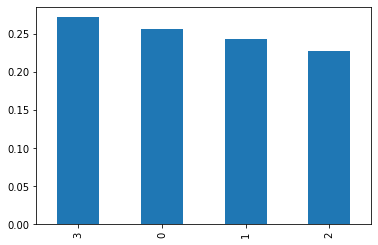

In [7]:
# nominal column
empdistr.plot(kind='bar')

### Plotting `pandas` DataFrames
* `DataFrame.plot()` plots the columns of a dataframe.
* Want multiple plot on the same axis? Get the data into the columns of a dataframe!

In [8]:
data.set_index('x').head() # remember the pandas plot x axis based on index by default!

,id,z0,z1,z2,z3
x,,,,,
0.0000,3,0.000000,0.000000,-0.000000,0.273816
0.1001,3,-0.102628,0.001595,0.052832,-0.487302
0.2002,3,-0.223206,0.006378,-0.198124,-0.844929
0.3003,2,-0.484955,0.014347,0.126451,-0.357906
0.4004,2,0.350514,0.025499,0.439444,0.602113


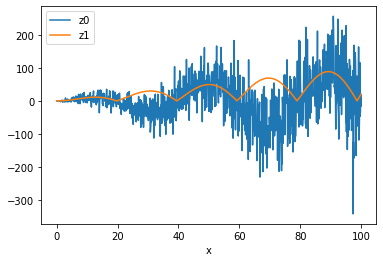

In [9]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis
data.set_index('x')[['z0', 'z1']].plot()

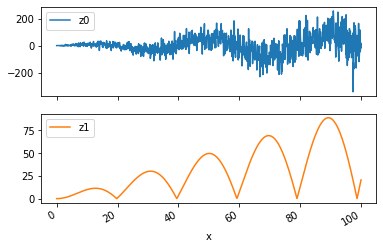

In [10]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis on seperate plots by assign parameter "subplots = True"
data.set_index('x')[['z0', 'z1']].plot(subplots=True);

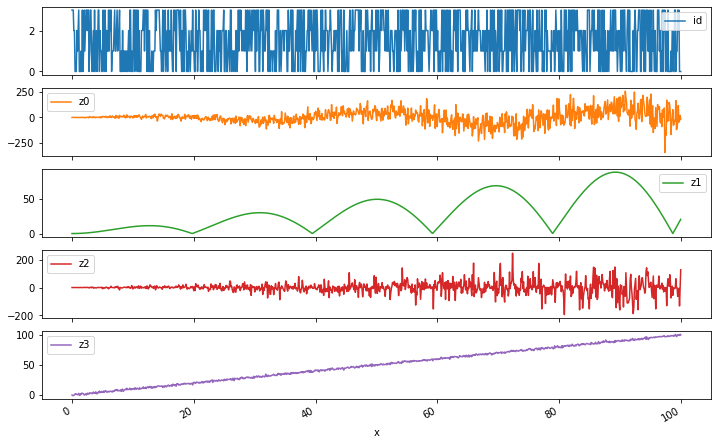

In [11]:
# plot all columns using 'x' as x-axis; elongate plots with 'figsize' keyword
data.set_index('x').plot(subplots=True, figsize=(12,8));

### Scatter-plots with Pandas
* You can create scatter plots with `DataFrame.plot` by passing `kind='scatter'`. Scatter plot requires numeric columns for `x` and `y` axis. 
    * These can be specified by `x` and `y` keywords each.
* To plot multiple column groups in a single axes, repeat plot method specifying target `ax`. It is recommended to specify color and label keywords to distinguish each groups.

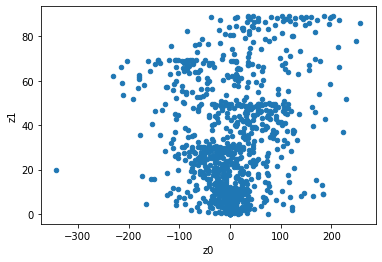

In [12]:
data.plot(kind='scatter', x='z0', y='z1')

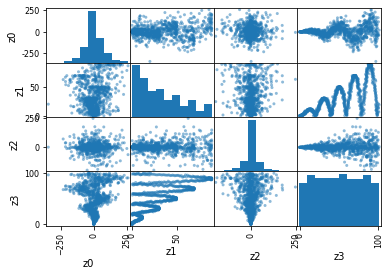

In [13]:
# plot all the histograms and scatterplots in one plot!
# univariate + bivariate analysis
pd.plotting.scatter_matrix(data.drop(['id', 'x'], axis=1));

There are other keywords that can be used with scatter. The keyword `c` may be given as the name of a column to provide colors for each point:

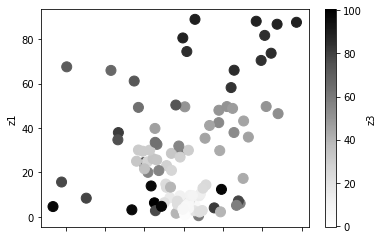

In [14]:
samp = data.sample(100)
samp.plot(kind='scatter', x='z0', y='z1', c='z3', s=100);
# Here c specify the color, and s specify the size of each data

You can pass other keywords supported by matplotlib `scatter`. The example below shows a bubble chart using a dataframe `column` values as bubble size.

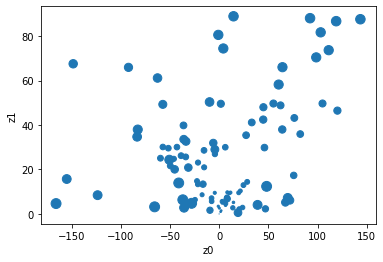

In [15]:
samp.plot(kind='scatter', x='z0', y='z1', s=samp['x']);

### Seaborn: pretty plotting made easy

The `seaborn` documentation has a *great* series of tutorials: https://seaborn.pydata.org/tutorial.html

#### `sns.scatterplot`
* The relationship between `x` and `y` can be shown for different subsets of the data using the `hue`, `size`, and `style` parameters. 
* These parameters control what visual semantics are used to identify the different subsets. 
* It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. 
    * Using redundant semantics (i.e. both `hue` and `style` for the same variable) can be helpful for making graphics more accessible.

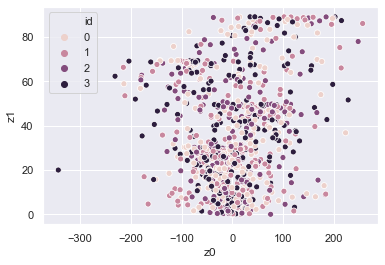

In [43]:

sns.set()
# This define the style of our graph with grid


sns.scatterplot(data=data, x='z0', y='z1', hue='id')
# hue is to groupby data by categories.

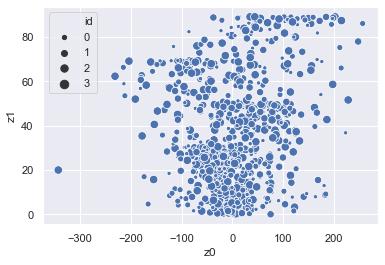

In [44]:
sns.scatterplot(data=data, x='z0', y='z1', size='id')

#### `sns.lmplot`

Plot a simple linear relationship between two variables:

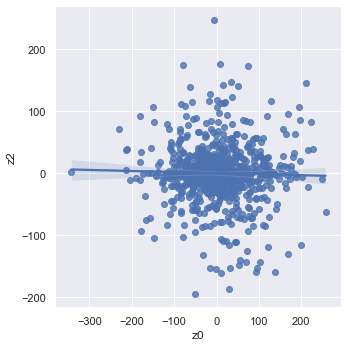

In [45]:
# plot a line of best fit
sns.lmplot(data=data, x='z0', y='z2');

#### `sns.distplot`

Plot the distribution with a histogram, kernel density estimate, and rug plot:

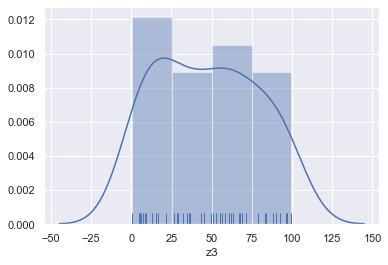

In [46]:
z3 = data.sample(50)['z3']
sns.distplot(z3, hist=True, kde=True, rug=True)

# kde: Whether to plot a gaussian kernel density estimate
# rug: Whether to draw a rugplot on the support axis.

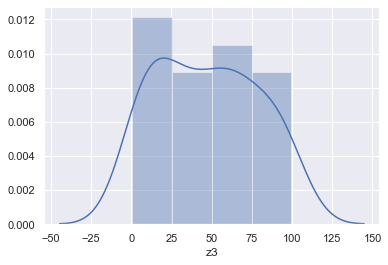

In [47]:
sns.distplot(z3, hist=True, kde=True, rug=False)

#### `sns.boxplot`

Draw a vertical boxplot grouped by a categorical variable:

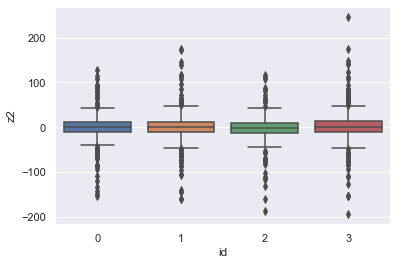

In [48]:
sns.boxplot(data=data, x='id', y='z2')

#### `sns.countplot`

In Seaborn a bar-chart can be created using the sns.countplot method and passing it the data.


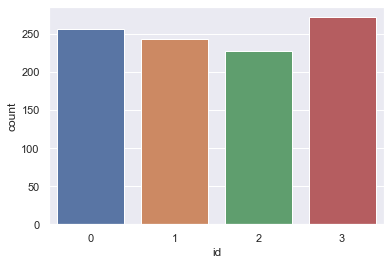

In [49]:
sns.countplot(data.id)

# Heatmap

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.

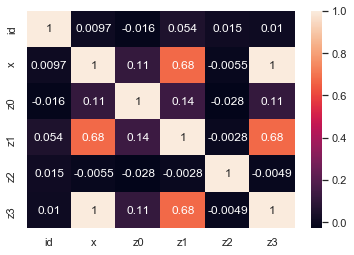

In [50]:
sns.heatmap(data.corr(), annot=True)

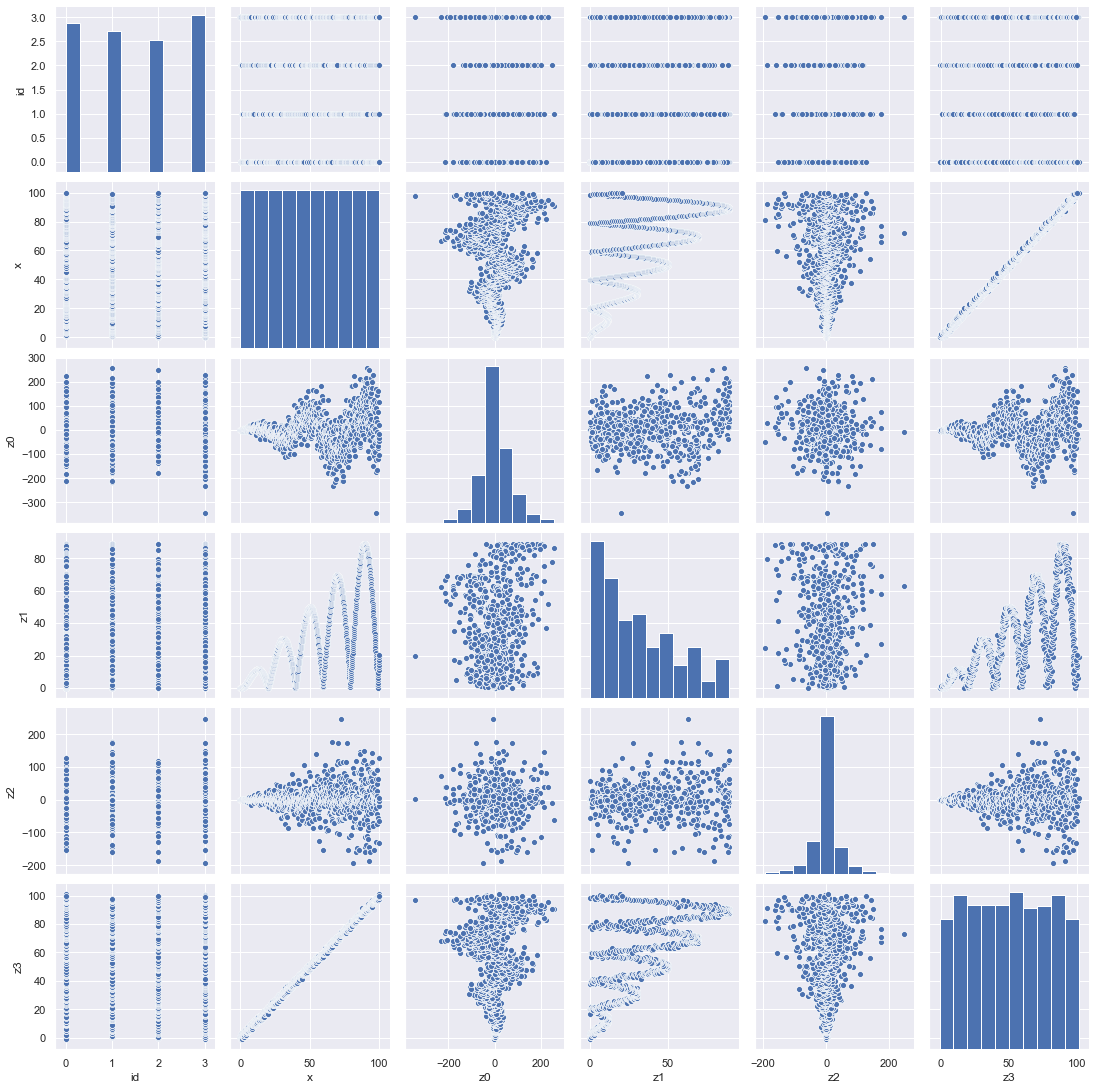

In [51]:
sns.pairplot(data)
# This is similar to pd.plotting.scattermatrix

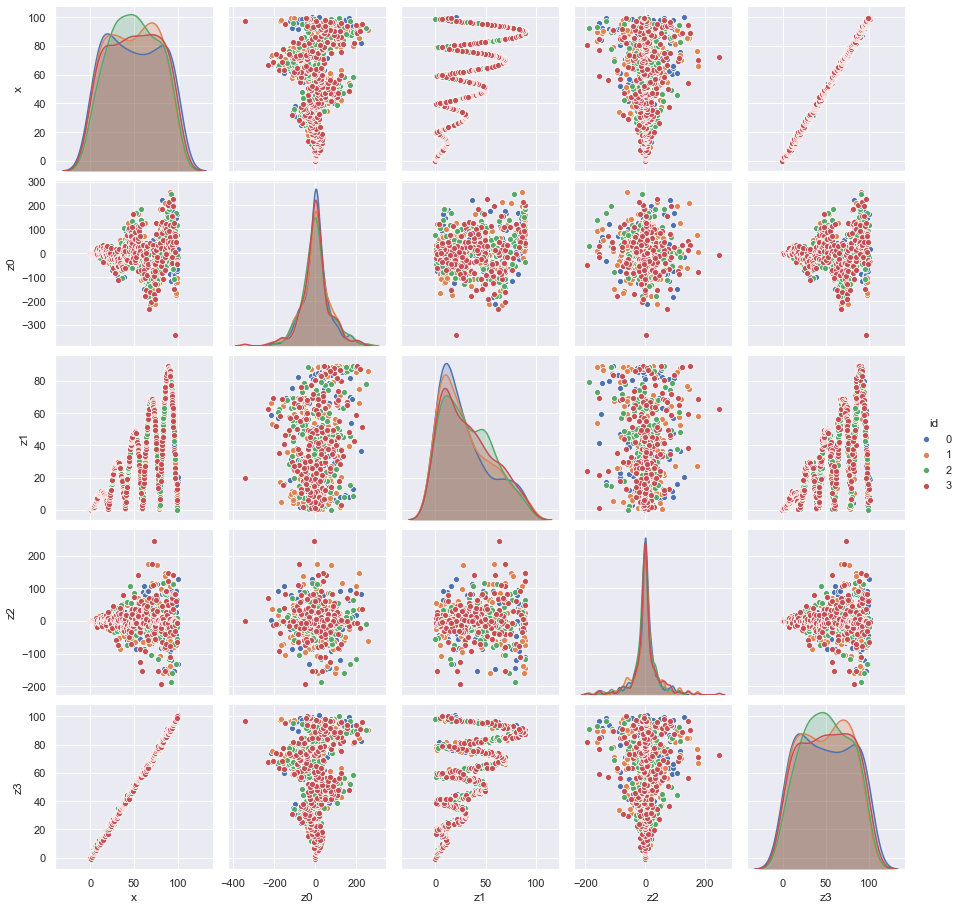

In [52]:
sns.pairplot(data, hue="id")
# pairplot showing the charts segmented according to the values of the categorical variable

In [53]:
data.head()

,id,x,z0,z1,z2,z3
0,3,0.0000,0.000000,0.000000,-0.000000,0.273816
1,3,0.1001,-0.102628,0.001595,0.052832,-0.487302
2,3,0.2002,-0.223206,0.006378,-0.198124,-0.844929
3,2,0.3003,-0.484955,0.014347,0.126451,-0.357906
4,2,0.4004,0.350514,0.025499,0.439444,0.602113


**A very informative graph is the jointplot that allows us to see a scatterplot together with a histogram of the two variables and see how they are distributed**

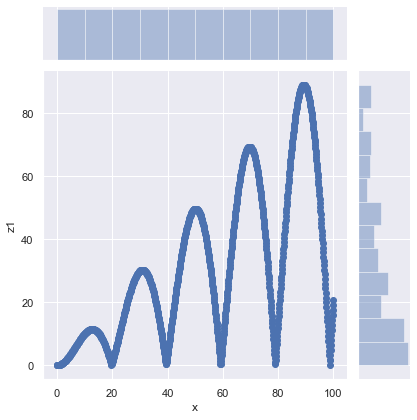

In [56]:
sns.jointplot(x='x', y='z1', data=data)

# ViolinPlot
To see how numerical col data distributed based on the categorical col

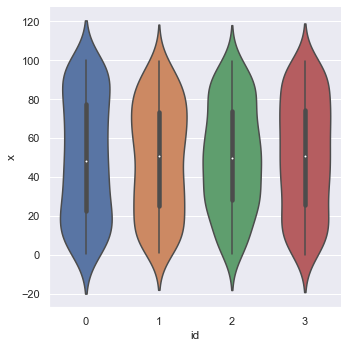

In [60]:
sns.catplot(x='id', y='x', kind='violin', data=data)

## Custom plots with `matplotlib`

* There are other great resources for learning the matplotlib API, for example, [this tutorial](https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html)

In [22]:
import matplotlib.pyplot as plt

### Matplotlib `axes` objects and Pandas plots

* An 'Axes' object contains the elements of a single plot.
    - contains a coordinate system (axis elements), 
    - the plot elements (e.g. line, bar), 
    - labels, 
    - tick-marks, etc.
    
* A `DataFrame.plot()` method call returns an `axes` object

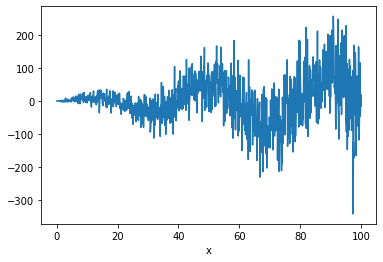

In [23]:
# notice the <matplotlib.axes._subplots.AxesSubplot at 0x1a21f7bcf8>
data.set_index('x')['z0'].plot()

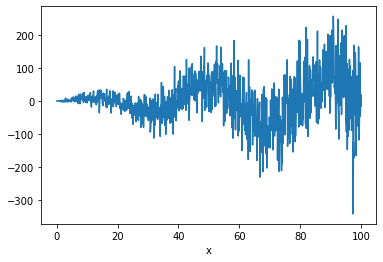

In [24]:
# save the plot as an variable
ax = data.set_index('x')['z0'].plot()

In [25]:
# get name of x-axis
ax.get_xlabel()

'x'

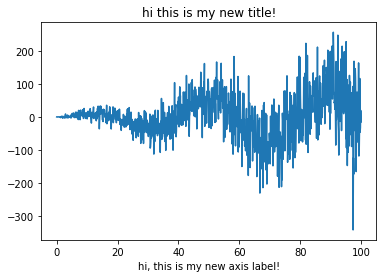

In [26]:
ax = data.set_index('x')['z0'].plot()
ax.set_xlabel('hi, this is my new axis label!')
ax.set_title('hi this is my new title!');

#### You can add elements to an Axes object

* The Pandas `.plot` method can add a plot to an existing Axes object using the `ax` keyword

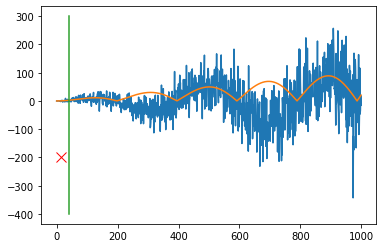

In [27]:
cur_graph = data['z0'].plot()

# add z1 to Axes
data['z1'].plot(ax=cur_graph)

# add a vertical line using matplotlib
plt.plot([40,40],[-400, 300])

# add a point using matplotlib
plt.plot(15,-200, marker='x', markersize=10, color='red')

# They have to in the same cell. Otherwise, it will plot separately

#### You can add a scatterplot to an existing scatterplot

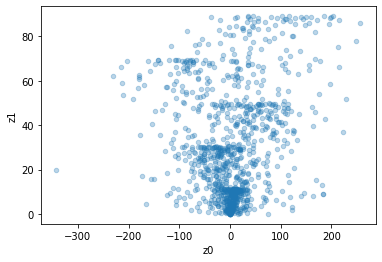

In [28]:
ax = data.plot(kind='scatter', x='z0', y='z1', alpha=0.3)

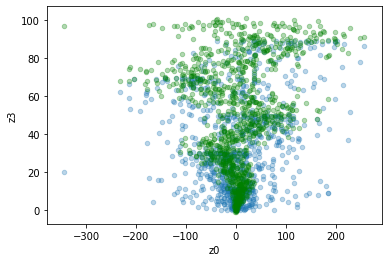

In [29]:
ax = data.plot(kind='scatter', x='z0', y='z1', alpha=0.3)

# the 'ax' keyword in Pandas plot method attaches the new plot to an existing Axes object
data.plot(kind='scatter', x='z0', y='z3', ax=ax, c='g', alpha=0.3)


### Matplotlib `figure` and adding to empty subplots

* A 'Figure' object is a top-level container for all plotting objects.
    - controls overall size, title, fonts, coordination between different elements of subplots.

<img src="https://i.stack.imgur.com/HZWkV.png" width="25%">  

* Instantiate an empty figure containing multiple plots with `plt.subplots`
    - `fig, axes = plt.subplots(R, C)` returns a figure `fig` and an multi-array of `axes`.
    - `axes` has `R` rows and `C` columns corresponding to the subplots laid out on a grid.
    - The `axes` are initially empty; they need to be given data to plot.

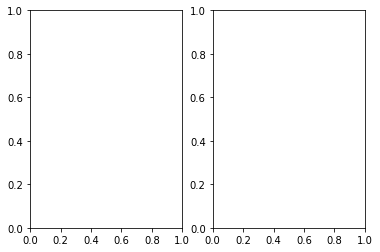

In [30]:
fig, axes = plt.subplots(1, 2)

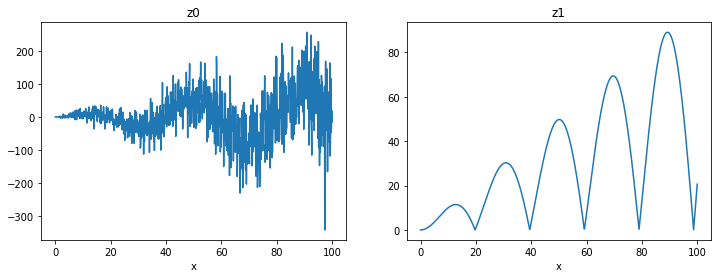

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

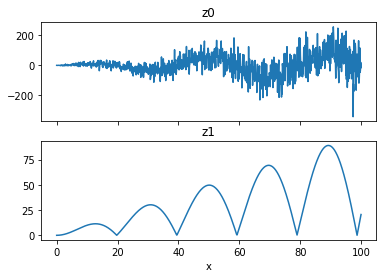

In [32]:
fig, axes = plt.subplots(2, 1, sharex=True)

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

*Sharex argument*
* True or 'all': x- or y-axis will be shared among all subplots.
* False or 'none': each subplot x- or y-axis will be independent.
* 'row': each subplot row will share an x- or y-axis.
* 'col': each subplot column will share an x- or y-axis.

### Practice: plots and groupby

* Can we plot histograms of `z2` for each value of `id`?

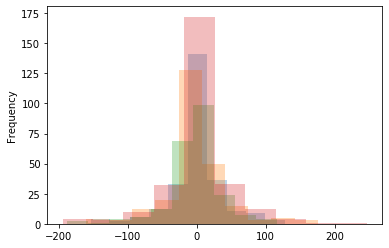

In [33]:
# Hard to understand! All graph will plot at the same graph!
data.drop('x', axis=1).groupby('id')['z2'].plot(kind='hist', alpha=0.3);

In [34]:
# show how each group look like
grps = data.groupby('id')
for k, gp in grps:
    print('**** ' + str(k) + ' ****', grps.get_group(k).head().to_string(), sep='\n', end='\n\n')

**** 0 ****
    id         x        z0        z1        z2        z3
5    0  0.500501  0.656201  0.039826 -0.002671  1.936168
6    0  0.600601  0.062109  0.057323 -0.300463  2.413680
7    0  0.700701 -0.104768  0.077980  0.025956  1.188075
12   0  1.201201  0.305381  0.228246 -0.671664  0.178395
13   0  1.301301 -2.206168  0.267588 -0.388144 -0.660209

**** 1 ****
    id         x        z0        z1        z2        z3
9    1  0.900901 -0.138246  0.128732 -0.294140  0.643807
15   1  1.501502  1.580229  0.355410 -0.357457  1.382945
19   1  1.901902 -3.038251  0.566949 -0.242903  2.138369
21   1  2.102102 -2.763949  0.690233  0.115374  1.088930
29   1  2.902903  9.130869  1.293967  0.566253  3.877149

**** 2 ****
    id         x        z0        z1        z2        z3
3    2  0.300300 -0.484955  0.014347  0.126451 -0.357906
4    2  0.400400  0.350514  0.025499  0.439444  0.602113
8    2  0.800801 -0.422969  0.101787 -0.369003  1.408457
10   2  1.001001 -0.181149  0.158800  0.031764  0.

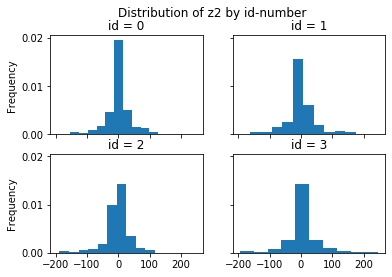

In [35]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for k, gp in data.groupby('id'):
    x_idx = k // 2
    y_idx = k % 2
    ax = axes[x_idx, y_idx]
    title = 'id = %d' % k
    gp['z2'].plot(kind='hist', density=True, ax=ax, title=title)
    
fig.suptitle('Distribution of z2 by id-number');

# More library like Bokeh(Interactive graph), Folium(Map graph)

* Bokeh: https://docs.bokeh.org/en/latest/docs/gallery.html
* Folium: https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e